In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay,classification_report, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bank.csv')
data.shape

(11162, 17)

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# Data Dictionary
    # 1. age (numeric).
    # 2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","selfemployed","retired","technician","services").
    # 3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed).
    # 4. education (categorical: "unknown","secondary","primary","tertiary").
    # 5. default: has credit in default? (binary: "yes","no").
    # 6. balance: average yearly balance, in euros (numeric) .
    # 7. housing: has housing loan? (binary: "yes","no").
    # 8. loan: has personal loan? (binary: "yes","no")

    # Related with the last contact of the current campaign:
    # 9. contact: contact communication type (categorical: "unknown","telephone","cellular") .
    # 10. day: last contact day of the month (numeric).
    # 11. month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec").
    # 12. duration: last contact duration, in seconds (numeric).
    # 13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact).
    # 14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted).
    # 15. previous: number of contacts performed before this campaign and for this client (numeric).
    # 16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success").

    -- ** TARGET ** --
    # 17. deposit - has the client subscribed a term deposit? (binary: "yes","no")./


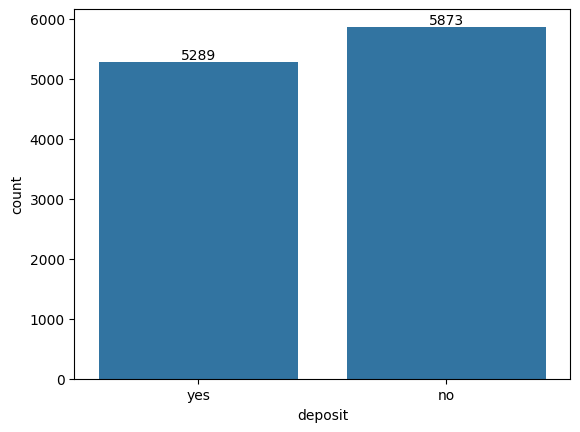

,proportion
deposit,
no,52.62
yes,47.38


In [4]:
# analyze the target column
ax = sns.countplot(x = data['deposit'])
ax.bar_label(ax.containers[0])
plt.show()
round(data['deposit'].value_counts(normalize = True)*100,2)

In [5]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [6]:
data.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [7]:
# number of unique of values in each categorical columns
for cols in data.columns:
  if data[cols].dtypes == 'O':
    print(cols,':', data[cols].nunique())

job : 12
marital : 3
education : 4
default : 2
housing : 2
loan : 2
contact : 3
month : 12
poutcome : 4
deposit : 2


In [8]:
encoder = LabelEncoder()
for cols in data.columns:
  if data[cols].dtypes == 'O':
    data[cols] = encoder.fit_transform(data[cols])

In [9]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [29]:
x = data.drop(['deposit'], axis =1)
y = data['deposit']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [11]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(7813, 16) (7813,)
(3349, 16) (3349,)


In [12]:
model = DecisionTreeClassifier(max_depth = 5, random_state = 42)
model.fit(x_train, y_train)
train_score = model.score(x_train, y_train)
print('Training Score: ', round(train_score*100,2),'%')

Training Score:  81.48 %


In [13]:
y_pred = model.predict(x_test)

In [14]:
y_pred[:10]

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1])

In [15]:
np.array(y_test.head(10))

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [16]:
print('Testing Score: ',round(accuracy_score(y_test, y_pred)*100,2),'%')
print('Recall Score: ',round(recall_score(y_test, y_pred)*100,2),'%')
print('Precision Score: ',round(precision_score(y_test, y_pred)*100,2),'%')

Testing Score:  80.44 %
Recall Score:  80.71 %
Precision Score:  78.99 %


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1742
           1       0.79      0.81      0.80      1607

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349



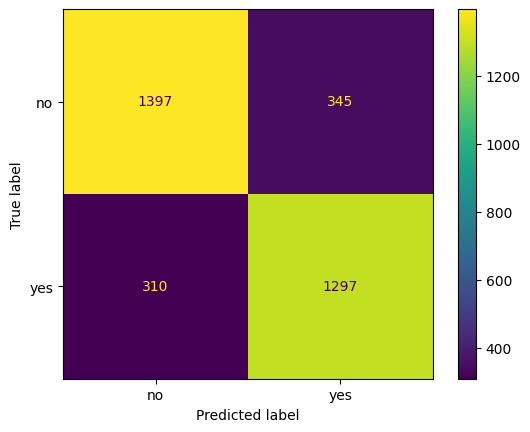

In [17]:
cm = ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels = ['no','yes'])
print('Classification Report:\n',classification_report(y_test, y_pred))

In [18]:
# looping max_depth(single parameter) to find the best value for it
for num in range(2,21,2):
  iter_model = DecisionTreeClassifier(max_depth = num, random_state = 42)
  iter_model.fit(x_train, y_train)
  training_score = iter_model.score(x_train, y_train)
  print(f'Training Accuracy for model with max_depth {num} ',round(training_score*100,2), '%')
  y_pred = iter_model.predict(x_test)
  print(f'Testing Accuracy for model with max_depth {num} ',round(accuracy_score(y_test,y_pred)*100,2),'%')
  print()

Training Accuracy for model with max_depth 2  72.49 %
Testing Accuracy for model with max_depth 2  70.56 %

Training Accuracy for model with max_depth 4  79.34 %
Testing Accuracy for model with max_depth 4  78.14 %

Training Accuracy for model with max_depth 6  82.29 %
Testing Accuracy for model with max_depth 6  80.62 %

Training Accuracy for model with max_depth 8  85.15 %
Testing Accuracy for model with max_depth 8  81.31 %

Training Accuracy for model with max_depth 10  88.76 %
Testing Accuracy for model with max_depth 10  80.77 %

Training Accuracy for model with max_depth 12  92.18 %
Testing Accuracy for model with max_depth 12  80.41 %

Training Accuracy for model with max_depth 14  95.07 %
Testing Accuracy for model with max_depth 14  79.37 %

Training Accuracy for model with max_depth 16  97.24 %
Testing Accuracy for model with max_depth 16  79.61 %

Training Accuracy for model with max_depth 18  98.46 %
Testing Accuracy for model with max_depth 18  78.86 %

Training Accuracy 

##Hyper Parameter tuning


In [19]:
# parameters for grid
params = {'max_depth':[6,7,8,9,10,11,12],
          'min_samples_split':[2,4,6,8],
          'min_samples_leaf':[1,2,3,4]}

In [20]:
# Tuning the model with above combination to find the best parameter
# creating the classifier
dt = DecisionTreeClassifier(random_state=42)

# grid_search setup
grid_search = GridSearchCV(estimator = dt,
                           param_grid = params,
                           n_jobs = -1,
                           verbose = 4)

# fit the model with the data
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [6, 7, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8]},
             verbose=4)

In [21]:
# displaying the best parameter and best score
print('Best parameter from the grid search: ',grid_search.best_params_)
print('Score for the best parameter: ',round(grid_search.best_score_*100,2))

Best parameter from the grid search:  {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 8}
Score for the best parameter:  81.03


In [22]:
# building the final model with the best parameter from the grid search
best_parameters = grid_search.best_params_
final_model = DecisionTreeClassifier(**best_parameters, random_state = 42)

# fit the data onto the final model
final_model.fit(x_train, y_train)

# model score
print('Training Score: ', round(final_model.score(x_train,y_train)*100,2),'%')


Training Score:  84.95 %


In [23]:
# Testing our model
y_pred_final = final_model.predict(x_test)

# metrics
print('Testing score', round(accuracy_score(y_test, y_pred_final)*100,2),'%')


Testing score 81.22 %


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1742
           1       0.81      0.80      0.80      1607

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349



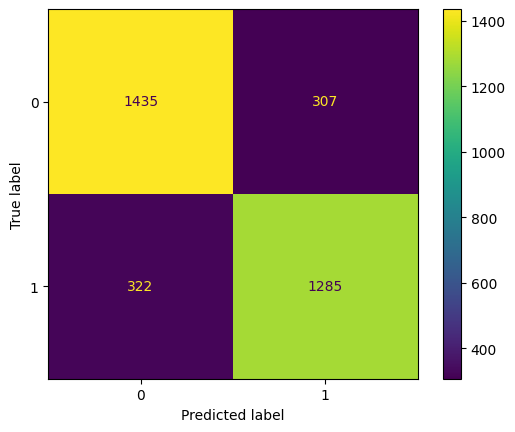

In [24]:
# detailed metrics
cm = ConfusionMatrixDisplay.from_predictions(y_test,y_pred_final)
print('Classification Report:\n', classification_report(y_test, y_pred_final))

In [28]:
# computing the AUC-ROC
fpr, tpr, thr = roc_curve(y_test, y_pred_final)
auc = roc_auc_score(y_test, y_pred_final)
print('Area under the curve: ',round(auc*100,2),'%')
print(thr)


Area under the curve:  81.17 %
[inf  1.  0.]


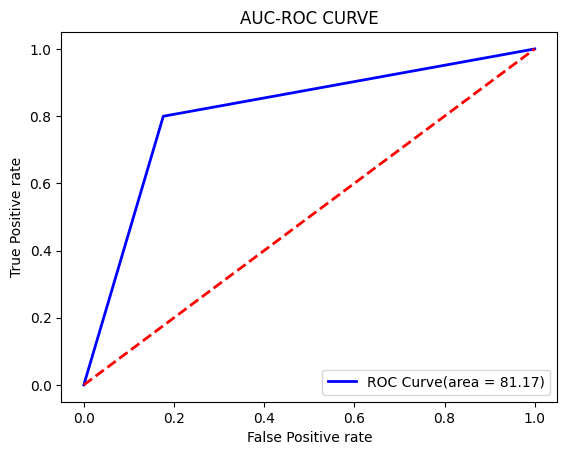

In [27]:
# Plotting the AUC ROC curve
plt.figure()
plt.plot(fpr, tpr, color = 'blue', lw = 2, label = f'ROC Curve(area = {round(auc*100,2)})')
plt.plot([0,1],[0,1],color = 'red', lw = 2, linestyle = '--')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('AUC-ROC CURVE')
plt.legend(loc = 4)
plt.show()